### Importação das Dependências

In [92]:
!pip install numpy pandas matplotlib seaborn scikit-learn xgboost

In [93]:
# Importar as blibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Processamento de Dados

In [94]:
#Importar dados para um DataFrame
df = pd.read_csv('C:/Users/lagma/desktop/projetos/Mart-Sales-Prediction/data/Train.csv')

In [95]:
# Mostrar o Dataframe
print("Formato do DataFrame: ", df.shape)
df.head()

Formato do DataFrame:  (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [96]:
# Verificar os tipos de colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Variáveis Categóricas:
Item_Identifier (Identificador do Item)
Item_Fat_Content (Teor de Gordura do Item)
Item_Type (Tipo de Item)
Outlet_Identifier (Identificador do Ponto de Venda)
Outlet_Size (Tamanho do Ponto de Venda)
Outlet_Location_Type (Tipo de Localização do Ponto de Venda)
Outlet_Type (Tipo de Ponto de Venda)

In [97]:
# Verificar se existem dados nulos
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Tratamento de Valores Ausentes

In [98]:
# valor médio da coluna "Item_Weight"
df['Item_Weight'].mean().round(4)

np.float64(12.8576)

In [99]:
# preencher os valores ausentes na coluna "Item_Weight" com o valor da "Média"
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [100]:
# moda da coluna "Outlet_Size"
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [101]:
# preenchendo os valores ausentes na coluna "Outlet_Size" com a Moda
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [102]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [103]:
# Retorna uma Series booleana com True onde há valores ausentes (NaN)
miss_values = df['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [104]:
 # preencher os valores ausentes
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode())

In [105]:
# checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Como podemos ver usamos um princípio fundamental que é o seguinte, nas colunas numéricas, os valores ausentes foram substituídos pela média, e nas variáveis categóricas, os valores ausentes foram  preenchidos com a moda.

### Análise de Dados

In [106]:
# Calculo das estatísticas descritivas:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Variáveis Numéricas

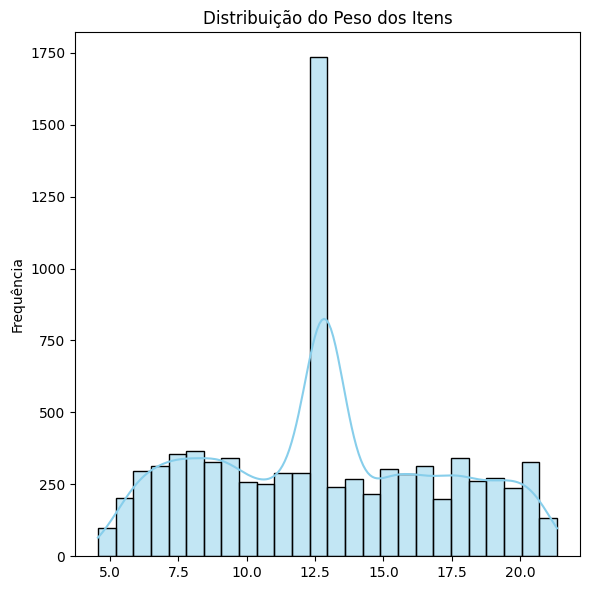

In [107]:
# Grafico da distribuição de Item_Weight
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Weight'], kde=True, color='skyblue')
plt.title('Distribuição do Peso dos Itens')
plt.xlabel('')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

O gráfico mostra uma distribuição bimodal com um pico acentuado em torno de 12.5 e uma distribuição mais espalhada entre 5 e 21. Existe um grande número de itens com peso próximo de 12.5, enquanto que os restantes pesos estão distribuídos de forma mais uniforme.

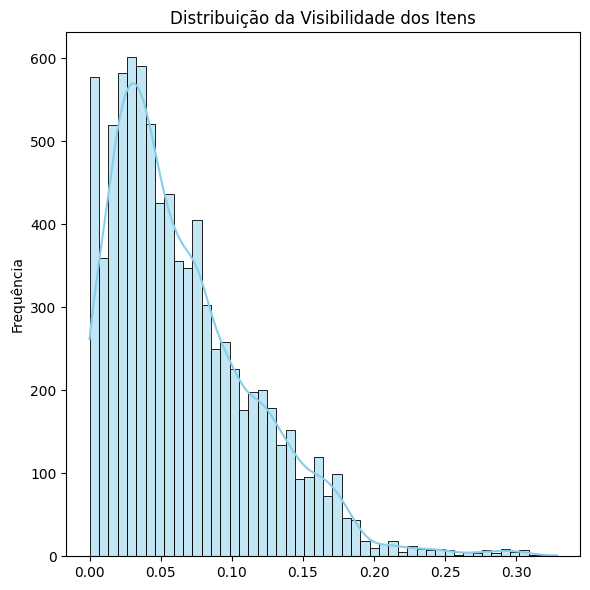

In [108]:
# Grafico da distribuição de Item_Visibility

plt.figure(figsize=(6,6))
sns.histplot(df['Item_Visibility'], kde=True, color='skyblue')
plt.title('Distribuição da Visibilidade dos Itens')
plt.xlabel('')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


A distribuição de Item_Visibility mostra que a maioria dos valores se concentra em torno de 0.05, com um certo enviesamento.

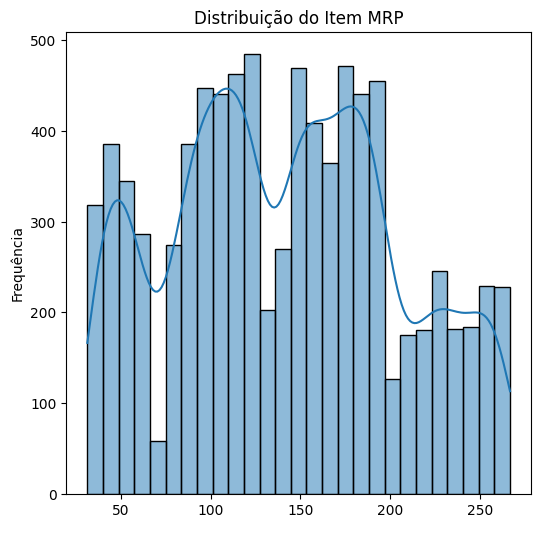

In [109]:
# Grafico da distribuição de Item_MRP
plt.figure(figsize=(6,6))
sns.histplot(df['Item_MRP'], kde=True)
plt.title('Distribuição do Item MRP')
plt.xlabel(' ')
plt.ylabel('Frequência')
plt.show()

A distribuição de Item_MRP (preço) múltiplos picos  com intervalos específicos de preço, indicando as faixas com maior quantidade de produtos.
A linha de densidade suavizada sobreposta ao histograma ajuda a visualizar melhor as tendências, mostrando que há pelo menos três modas diferentes.

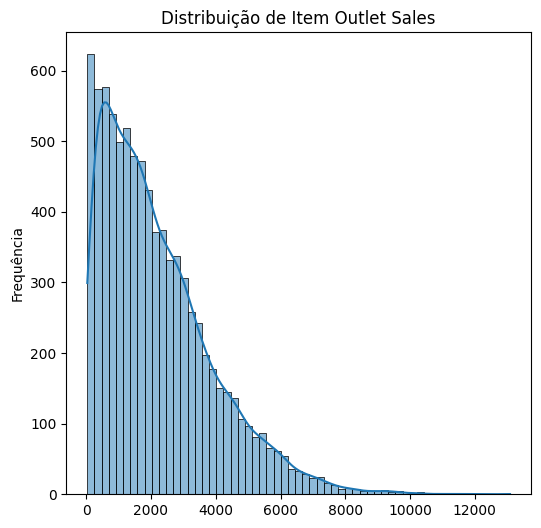

In [110]:
# Grafico da distribuição de Item_Outlet_Sales
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Distribuição de Item Outlet Sales')
plt.xlabel('')
plt.ylabel('Frequência')
plt.show()

A distribuição é assimétricade no Item_Outlet_Sales evidencia um enviesamento, com um forte pico próximo a 0, indicando que a maioria dos itens tem vendas relativamente baixas.

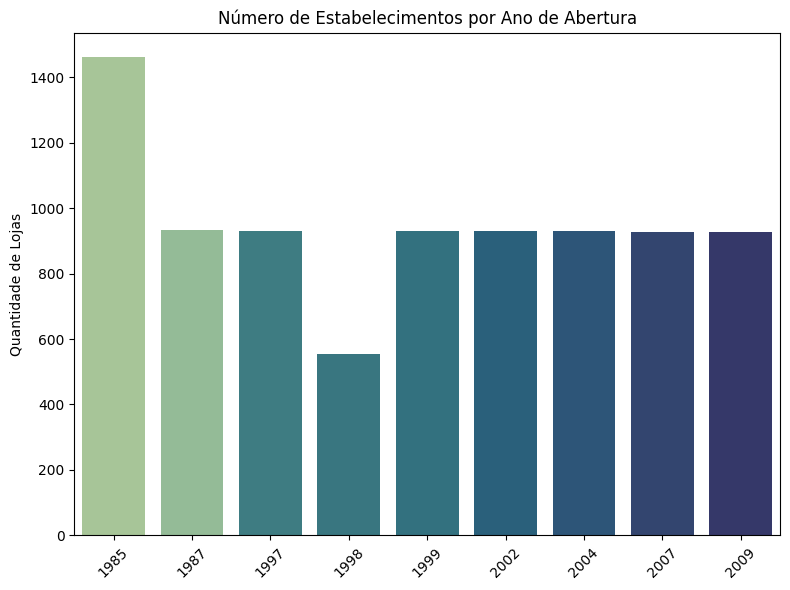

In [111]:
# Outlet_Establishment_Year column
plt.figure(figsize=(8,6))
sns.countplot(
    x='Outlet_Establishment_Year',
    hue='Outlet_Establishment_Year',  # usa a mesma coluna no eixo X
    data=df,
    palette='crest',
    legend=False  # evita duplicar a legenda desnecessariamente
)
plt.title('Número de Estabelecimentos por Ano de Abertura')
plt.xlabel('')
plt.ylabel('Quantidade de Lojas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



O gráfico de contagem de Outlet_Establishment_Year mostra a quantidade de outlets (lojas) abertos a cada ano, destacando os anos com maior número de estabelecimentos.

### Variáveis Categóricas

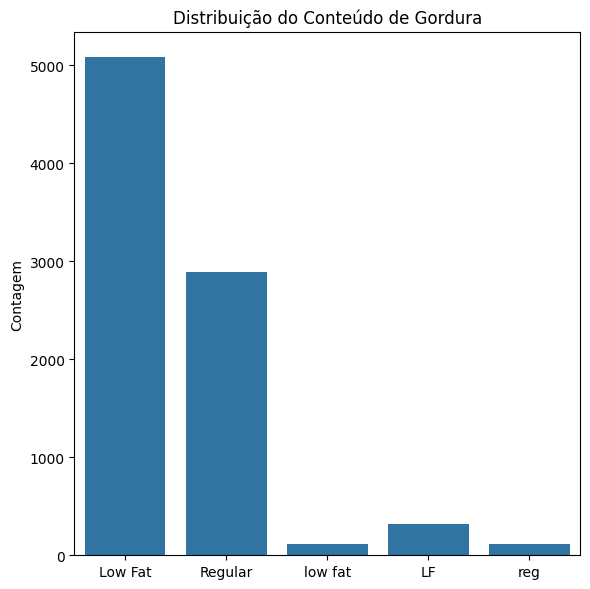

In [112]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.title('Distribuição do Conteúdo de Gordura')
plt.xlabel('')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()



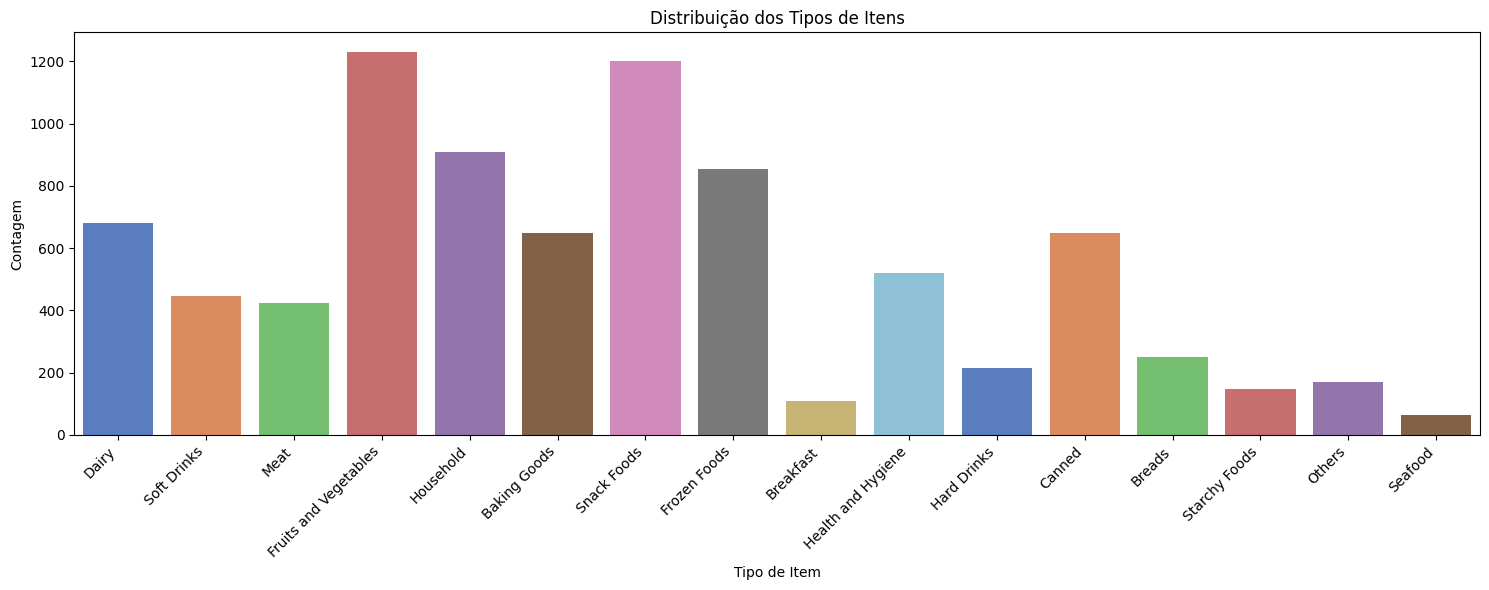

In [113]:
# Item_Type column
plt.figure(figsize=(15,6))
sns.countplot(
    x='Item_Type',
    hue='Item_Type', 
    data=df,
    palette='muted',
    legend=False  
)
plt.title('Distribuição dos Tipos de Itens')
plt.xlabel('Tipo de Item')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 Foi possível identificar quais os tipos de item mais frequentes no conjunto de dados, sendo os "Fruits and Vegetables" e "Snack Foods" os mais comuns.

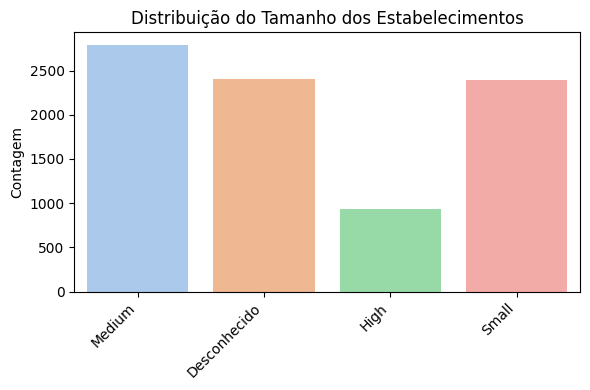

In [114]:
# Substituindo valores nulos na coluna 'Outlet_Size' por 'Desconhecido' (ou outro valor de sua escolha)
df['Outlet_Size'] = df['Outlet_Size'].fillna('Desconhecido')

# Criando o gráfico
plt.figure(figsize=(6,4))
sns.countplot(
    x='Outlet_Size',
    hue='Outlet_Size', 
    data=df,
    palette='pastel', 
    legend=False  
)
plt.title('Distribuição do Tamanho dos Estabelecimentos')
plt.xlabel('')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()



Revelou a frequência de cada tamanho de loja no conjunto de dados.

### Pré-Processamento de Dados

In [115]:
# Mostrar o Dataframe
print("Formato do DataFrame: ", df.shape)
df.head()

Formato do DataFrame:  (8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Desconhecido,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [116]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [117]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [118]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

### Label Encoding

Usamos Label Encoding para converter dados categóricos em numéricos para que possam ser utilizados em algoritmos de machine learning.

In [119]:
# Criar uma nova instância do LabelEncoder
encoder = LabelEncoder()

In [120]:
# Aplicar o encoder nas colunas categóricas
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])


In [121]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,2,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,2,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052


Dividir as Características e o Alvo (features and Target)

In [122]:
# Características (features) — todas as colunas, menos a que queremos prever
X = df.drop('Item_Outlet_Sales', axis=1)

# Alvo (target) — a coluna que queremos prever
y = df['Item_Outlet_Sales']


In [123]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [124]:
print(Y)

NameError: name 'Y' is not defined

Dividir os dados em dados de Treino e dados de Teste 

In [ ]:
# X e y já estão definidos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,          # features e target
    test_size=0.2, # 20% para teste, 80% para treino
    random_state=42 # define uma semente para resultados reproduzíveis
)


In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (6818, 11)
X_test: (1705, 11)
y_train: (6818,)
y_test: (1705,)


In [ ]:
# Definir o caminho onde você quer salvar a cópia limpa
df_limpo = 'C:/Users/lagma/desktop/projetos/Mart-Sales-Prediction/data/df_limpo.csv'

# Salvar o dataframe limpo como um novo arquivo CSV
df.to_csv(df_limpo, index=False)  # index=False para não salvar o índice do pandas


Aprendizagem do Modelo de Machine Learning

XGBoost Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Supondo que X e y já estão definidos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar
regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Prever com os dados de teste
y_pred = regressor.predict(X_test)


In [ ]:
# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular R²
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


NameError: name 'mean_squared_error' is not defined

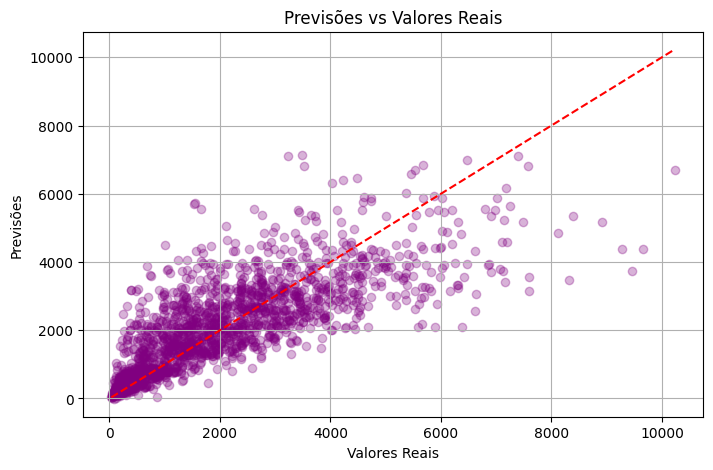

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3, color='purple')
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsões vs Valores Reais")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # linha de referência
plt.grid()
plt.show()


In [ ]:
# Obter importâncias
importance = regressor.feature_importances_

# Combinar com os nomes das colunas
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Ver top 10
print(feature_importance_df.head(10))


                      Feature  Importance
10                Outlet_Type    0.629140
5                    Item_MRP    0.131333
7   Outlet_Establishment_Year    0.120765
9        Outlet_Location_Type    0.022273
4                   Item_Type    0.016269
3             Item_Visibility    0.015070
2            Item_Fat_Content    0.014143
8                 Outlet_Size    0.013798
1                 Item_Weight    0.013203
0             Item_Identifier    0.012172


C:\Users\lagma\AppData\Local\Temp\ipykernel_17836\1895908171.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


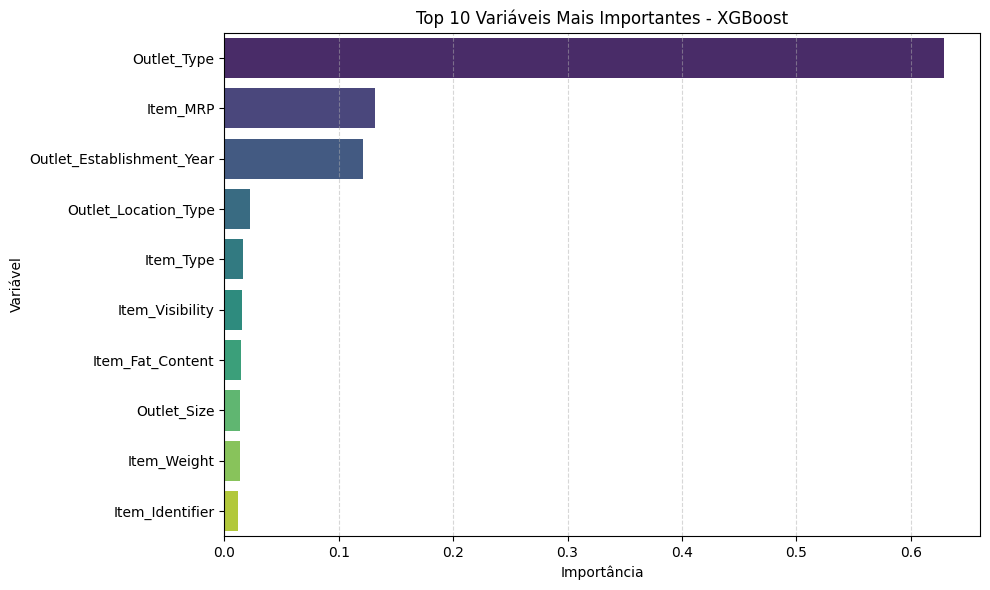

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Obter importância das features
importance = regressor.feature_importances_

# Criar DataFrame com as features e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title("Top 10 Variáveis Mais Importantes - XGBoost")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig("importancia_variaveis_xgboost.png", dpi=300)


<Figure size 640x480 with 0 Axes>